In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [2]:
RANDOM_SEED = 42

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Проект/prep_data.csv')

In [ ]:
data.dtypes

Country                object
City                   object
AQI Value               int64
AQI Category           object
CO AQI Value            int64
CO AQI Category        object
Ozone AQI Value         int64
Ozone AQI Category     object
NO2 AQI Value           int64
NO2 AQI Category       object
PM2.5 AQI Value         int64
PM2.5 AQI Category     object
lat                   float64
lng                   float64
dtype: object

Регрессия. Удалим колонки с координатами, так как они пока только для визуализации использовались.

In [5]:
data.drop(['lat', 'lng'], axis=1, inplace=True)

In [ ]:
data.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

In [6]:
data.drop(['City','Country'],axis=1,inplace=True)

In [ ]:
X=data.drop('AQI Value',axis=1)
y=data['AQI Value']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=RANDOM_SEED)

Попробуем только на вещественных признаках.

In [ ]:
X_train_num = X_train.drop(['AQI Category','CO AQI Category', 'Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'],axis=1)
X_test_num = X_test.drop(['AQI Category','CO AQI Category', 'Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'],axis=1)

In [ ]:
linr = LinearRegression()

linr.fit(X_train_num, y_train)

y_pred_train = linr.predict(X_train_num)
y_pred_test = linr.predict(X_test_num)
linr_r2_train = r2_score(y_train, y_pred_train)
linr_r2_test = r2_score(y_test, y_pred_test)

print(f'R2 Train: {linr_r2_train}')
print(f'R2 Test: {linr_r2_test}')

R2 Train: 0.9740498707460614
R2 Test: 0.972294629978387


In [ ]:
print(f'MSE Train: {MSE(y_train, y_pred_train)}')
print(f'MSE Test: {MSE(y_test, y_pred_test)}')

MSE Train: 58.55182002906896
MSE Test: 64.71311614108971


Так как  у нас сразу присутствовала линейная зависимость, то получили вполне неплохой результат.

Стандартизируем фичи

In [ ]:
sc = StandardScaler()
X_train_num_std = pd.DataFrame(sc.fit_transform(X_train_num), columns=X_train_num.columns)
X_test_num_std = pd.DataFrame(sc.transform(X_test_num), columns=X_test_num.columns)

In [ ]:
linr_sc = LinearRegression()

linr_sc.fit(X_train_num_std, y_train)

y_pred_train_sc = linr_sc.predict(X_train_num_std)
y_pred_test_sc = linr_sc.predict(X_test_num_std)
linr_r2_train_sc = r2_score(y_train, y_pred_train_sc)
linr_r2_test_sc = r2_score(y_test, y_pred_test_sc)

print(f'R2 Train: {linr_r2_train_sc}')
print(f'R2 Test: {linr_r2_test_sc}')
print(f'MSE Train: {MSE(y_train, y_pred_train_sc)}')
print(f'MSE Test: {MSE(y_test, y_pred_test_sc)}')

R2 Train: 0.9740498707460614
R2 Test: 0.972294629978387
MSE Train: 58.55182002906897
MSE Test: 64.71311614108974


Стандартизация фич ни на сотую не изменила результат.

In [ ]:
resLin = pd.DataFrame(linr_sc.coef_,index = X_train_num_std.columns,columns = ['coef'])

resLin.sort_values('coef')

,coef
NO2 AQI Value,0.381562
CO AQI Value,0.496343
Ozone AQI Value,5.438276
PM2.5 AQI Value,44.032851


In [ ]:
lasso_num = Lasso()

lasso_num.fit(X_train_num_std, y_train)

y_pred_train_lasso = lasso_num.predict(X_train_num_std)
y_pred_test_lasso = lasso_num.predict(X_test_num_std)
lasso_num_train = r2_score(y_train, y_pred_train_lasso)
lasso_num_test = r2_score(y_test, y_pred_test_lasso)

print(f'R2 Train: {lasso_num_train}')
print(f'R2 Test: {lasso_num_test}')
print(f'MSE Train: {MSE(y_train, y_pred_train_lasso)}')
print(f'MSE Test: {MSE(y_test, y_pred_test_lasso)}')

R2 Train: 0.9732605760433954
R2 Test: 0.9714278562474473
MSE Train: 60.33272219445533
MSE Test: 66.73769220972144


In [ ]:
res = pd.DataFrame(lasso_num.coef_,index = X_train_num_std.columns,columns = ['coef'])

res.sort_values('coef')

,coef
NO2 AQI Value,0.000000
CO AQI Value,0.091993
Ozone AQI Value,4.608783
PM2.5 AQI Value,43.695829


Качество даже чуть уменьшилось на сотую. И при этом у нас занулился один признак. А CO тоже близко к нулю.

In [ ]:
param_grid = [
        {'alpha': [.0004, .0005], 'l1_ratio': [.5, .8, 1]},
]

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                               return_train_score=True)

grid_search.fit(X_train_num_std, y_train)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

7.660741054987355 {'alpha': 0.0004, 'l1_ratio': 0.5}
7.660723754582797 {'alpha': 0.0004, 'l1_ratio': 0.8}
7.660715205571033 {'alpha': 0.0004, 'l1_ratio': 1}
7.660750131283334 {'alpha': 0.0005, 'l1_ratio': 0.5}
7.660726418580959 {'alpha': 0.0005, 'l1_ratio': 0.8}
7.660715611564489 {'alpha': 0.0005, 'l1_ratio': 1}


In [ ]:
elastic=ElasticNet(alpha=0.0004, l1_ratio=0.1).fit(X_train_num_std,y_train)

y_elastic_train = elastic.predict(X_train_num_std)
y_elastic_test = elastic.predict(X_test_num_std)
r2_elastic_train= r2_score(y_train, y_elastic_train)
r2_elastic_test = r2_score(y_test, y_elastic_test)

print(f'R2 Train: {r2_elastic_train}')
print(f'R2 Test: {r2_elastic_test}')
print(f'MSE Train: {MSE(y_train, y_elastic_train)}')
print(f'MSE Test: {MSE(y_test, y_elastic_test)}')

R2 Train: 0.9740497034667678
R2 Test: 0.9722843365724962
MSE Train: 58.55219746484203
MSE Test: 64.73715907465741


Попробуем теперь ForestRegressor на нестандартизированных признаках

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=5)
regressor.fit(X_train_num, y_train)
y_rf_train = regressor.predict(X_train_num)
y_rf_test = regressor.predict(X_test_num)
r2_rf_train= r2_score(y_train, y_rf_train)
r2_rf_test = r2_score(y_test, y_rf_test)

print(f'R2 Train: {r2_rf_train}')
print(f'R2 Test: {r2_rf_test}')
print(f'MSE Train: {MSE(y_train, y_rf_train)}')
print(f'MSE Test: {MSE(y_test, y_rf_test)}')

R2 Train: 0.9928546308159559
R2 Test: 0.9916813318257297
MSE Train: 16.122246113356308
MSE Test: 19.430418697919876


Определенно качество улучшилос. Квадрат отклонений (MSE) значительно уменьшился и в нашем случае это имеет значение, так как если отклонение от фактического зачение будет +-19, то мы можем остаться в категории. А вот если оно будет +-60 как в предыдущих шагах, то мыточно выйдем за рамки фактической категории.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_num, y_train)
y_knn_train = knn.predict(X_train_num)
y_knn_test = knn.predict(X_test_num)
r2_knn_train= r2_score(y_train, y_knn_train)
r2_knn_test = r2_score(y_test, y_knn_test)

print(f'R2 Train: {r2_knn_train}')
print(f'R2 Test: {r2_knn_test}')
print(f'MSE Train: {MSE(y_train, y_knn_train)}')
print(f'MSE Test: {MSE(y_test, y_knn_test)}')

R2 Train: 0.9987413940454297
R2 Test: 0.9981107022081938
MSE Train: 2.839818970394117
MSE Test: 4.412947646282446


Здесь показатели еще лучше, при том, что мы имеем предсказания только на вещественных признаках. Не вижу смысла добавлять категориальные.

Не смотря на то, что я последние модели обучала не на стандартизированных признаках, здесь я хочу посмотреть результат на них.

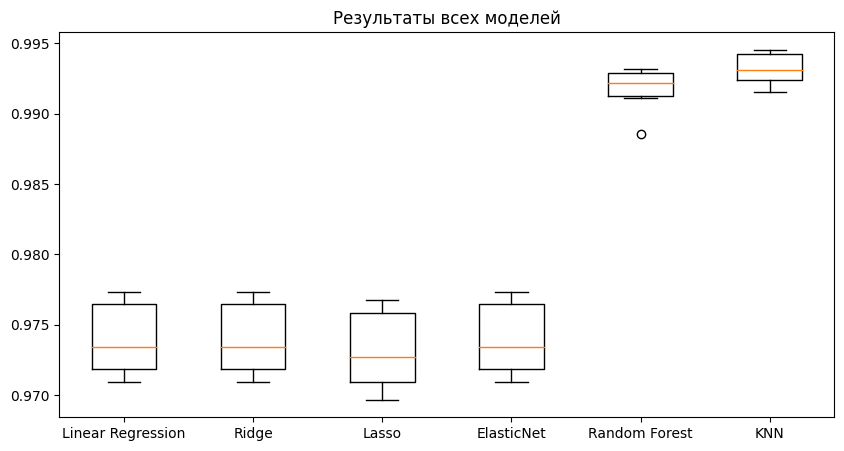

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Результаты всех моделей')
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1),"Lasso": Lasso(),"ElasticNet" :ElasticNet(alpha=0.0004, l1_ratio=0.1), "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),'KNN': KNeighborsRegressor(n_neighbors=10)}
outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_num_std,y_train,cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()

Видим, что качество всех моделей достаточно высокое, но KNN дает превосходный результат.

In [7]:
data.drop(['PM2.5 AQI Value'], axis=1, inplace=True)
X=data.drop('AQI Value',axis=1)
y=data['AQI Value']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=RANDOM_SEED)

In [8]:
X_train_num = X_train.drop(['AQI Category','CO AQI Category', 'Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'],axis=1)
X_test_num = X_test.drop(['AQI Category','CO AQI Category', 'Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category'],axis=1)

In [9]:
sc = StandardScaler()
X_train_num_std = pd.DataFrame(sc.fit_transform(X_train_num), columns=X_train_num.columns)
X_test_num_std = pd.DataFrame(sc.transform(X_test_num), columns=X_test_num.columns)

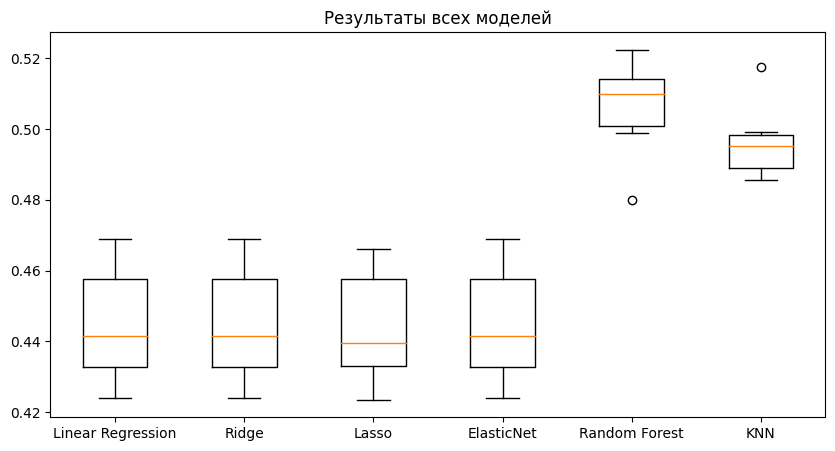

In [10]:
plt.figure(figsize=(10,5))
plt.title('Результаты всех моделей')
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1),"Lasso": Lasso(),"ElasticNet" :ElasticNet(alpha=0.0004, l1_ratio=0.1), "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5),'KNN': KNeighborsRegressor(n_neighbors=10)}
outcome = []

for model in models.values():
    kf = KFold(n_splits=6,random_state = 42,shuffle = True)
    cv_result = cross_val_score(model,X_train_num_std,y_train,cv=kf)
    outcome.append(cv_result)
plt.boxplot(outcome,labels = models.keys())
plt.show()

Теперь упакуем лучшую модель.

In [ ]:
numeric = [c for c in X_train.columns if X_train[c].dtype.name != 'object']

In [ ]:
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numeric)
])

pipeline = Pipeline(steps=[
    ('data_scaling', column_transformer),
    ('regression', KNeighborsRegressor(n_neighbors=10))
])

model = pipeline.fit(X_train_num, y_train)
y_pred = model.predict(X_test_num)
print("Test R2 = %.5f" %r2_score(y_test, y_pred))

Test R2 = 0.98013


In [ ]:
import pickle
import gzip
pkl_filename = "pickle_model.pkl"

with gzip.open(pkl_filename, 'wb') as f:
    pickle.dump(pipeline, f)



---



---



---



Простейшая модель случайного леса - классификация категории индекса качества воздуха

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay


In [ ]:
print('Num of countries: ',data['Country'].nunique())
print('Num of cities: ',data['City'].nunique())


Num of countries:  175
Num of cities:  22459


Количество городов слишком большое, чтобы их кодировать. Для предсказания классов воспользуемся пока просто числовыми значениями, для этого удалим страну и город

еще удалим countryAverage чтобы не было утечки

In [ ]:
data.drop(['City','Country','countryAverage'],axis=1,inplace=True)

In [ ]:
cat_cols = [col for col in data.columns.difference(['AQI Category']) if 'Category' in col]
for col in cat_cols:
  newCat = pd.get_dummies(data[col], prefix=col)
  data = pd.concat([data,newCat],axis=1)
  data.drop([col], axis=1, inplace=True)

In [ ]:
data.head()

,AQI Value,AQI Category,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng,CO AQI Category_Good,NO2 AQI Category_Good,NO2 AQI Category_Moderate,Ozone AQI Category_Good,Ozone AQI Category_Moderate,Ozone AQI Category_Unhealthy,Ozone AQI Category_Unhealthy for Sensitive Groups,PM2.5 AQI Category_Good,PM2.5 AQI Category_Moderate,PM2.5 AQI Category_Unhealthy,PM2.5 AQI Category_Unhealthy for Sensitive Groups
0,51,Moderate,1,36,0,51,44.744400,44.203100,1,1,0,1,0,0,0,0,1,0,0
1,41,Good,1,5,1,41,-11.295918,-41.987157,1,1,0,1,0,0,0,1,0,0,0
2,66,Moderate,1,39,2,66,37.166700,15.183300,1,1,0,1,0,0,0,0,1,0,0
3,34,Good,1,34,0,20,53.016700,20.883300,1,1,0,1,0,0,0,1,0,0,0
4,22,Good,0,22,0,6,-17.592920,-149.606367,1,1,0,1,0,0,0,1,0,0,0


Посмотрим на распределение категорий.

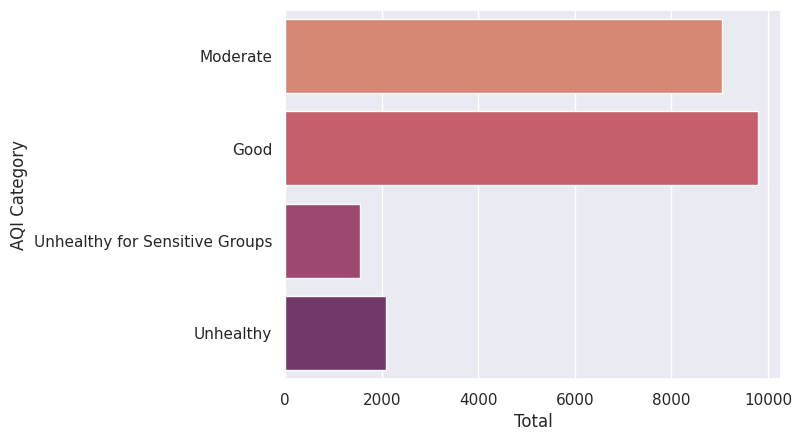

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="AQI Category", data=data, palette="flare")
plt.ylabel('AQI Category')
plt.xlabel('Total')
plt.show()

У нас определенно есть дисбаланс классов, попробуем сначала обучить просто модели, а потом используем технику [SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#smote)

In [ ]:
X=data.drop('AQI Category',axis=1)
y=data['AQI Category']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=RANDOM_SEED)

Словарь\список для сохранения данных

In [ ]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)

In [ ]:
from sklearn.metrics import classification_report

# Standard Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
DTC = accuracy_score(y_pred_dt,y_test)

# Decision Tree with Gini Impurity
dt_clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_clf_gini.fit(X_train, y_train)
y_pred_dt_gini = dt_clf_gini.predict(X_test)
DTC_gini = accuracy_score(y_pred_dt_gini,y_test)

# Decision Tree with Information Gain (Entropy)
dt_clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_clf_entropy.fit(X_train, y_train)
y_pred_dt_entropy = dt_clf_entropy.predict(X_test)
DTC_entropy = accuracy_score(y_pred_dt_entropy,y_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Standard Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=10)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
RF_clf = accuracy_score(y_pred_rf,y_test)


In [ ]:
from sklearn.svm import SVC

# Standard SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)
SVM_clf = accuracy_score(y_pred_svm_linear,y_test)

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=1)
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)
SVM_rbf = accuracy_score(y_pred_svm_rbf,y_test)

# SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', C=1, degree=3)
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)
SVM_poly = accuracy_score(y_pred_svm_poly,y_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Standard k-NN with k=3 and Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_knn_euclidean = knn_euclidean.predict(X_test)
KNN_euclidean = accuracy_score(y_pred_knn_euclidean,y_test)

# k-NN with k=3 and Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_knn_manhattan = knn_manhattan.predict(X_test)
KNN_manhattan = accuracy_score(y_pred_knn_manhattan,y_test)

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression',
                                  'Standard Decision Tree','Decision Tree with Gini Impurity',
                                  'Decision Tree with Information Gain (Entropy)',
                                  'Standard Random Forest','Standard SVM with Linear Kernel',
                                  'SVM with RBF Kernel','SVM with Polynomial Kernel',
                                  'k-NN with k=3 and Euclidean distance', 'k-NN with k=3 and Manhattan distance'],
                        'Accuracy': [LRAcc*100,
                                     DTC*100,DTC_gini*100,DTC_entropy*100,
                                     RF_clf*100, SVM_clf*100,SVM_rbf*100,SVM_poly*100,
                                     KNN_euclidean*100, KNN_manhattan*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,100.000000
1,Standard Decision Tree,100.000000
2,Decision Tree with Gini Impurity,100.000000
3,Decision Tree with Information Gain (Entropy),100.000000
5,Standard SVM with Linear Kernel,100.000000
4,Standard Random Forest,99.985159
9,k-NN with k=3 and Manhattan distance,99.050163
7,SVM with Polynomial Kernel,98.070644
8,k-NN with k=3 and Euclidean distance,97.803503
6,SVM with RBF Kernel,52.849510


Интересно как измениться результат после работы с дисбалансом классов.

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

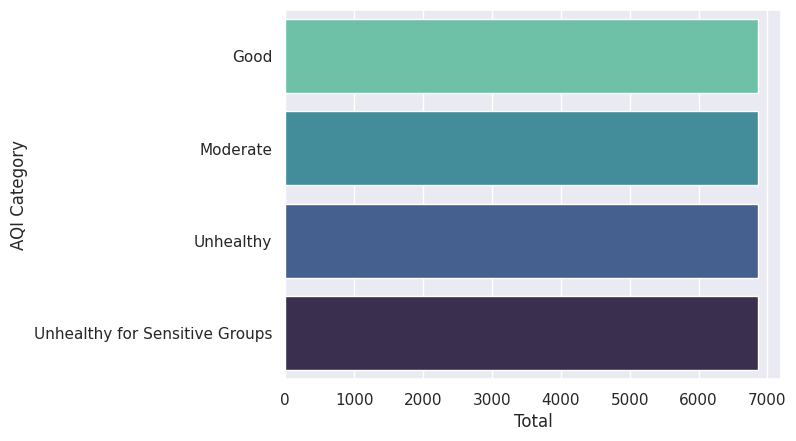

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=data, palette="mako_r")
plt.ylabel('AQI Category')
plt.xlabel('Total')
plt.show()

In [ ]:
LRclassifier2 = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier2.fit(X_train, y_train)
y_pred2 = LRclassifier2.predict(X_test)
LRAcc2 = accuracy_score(y_pred2,y_test)

# Standard Decision Tree
dt_clf2 = DecisionTreeClassifier(random_state=42)
dt_clf2.fit(X_train, y_train)
y_pred_dt2 = dt_clf2.predict(X_test)
DTC2 = accuracy_score(y_pred_dt2,y_test)

# Decision Tree with Gini Impurity
dt_clf_gini2 = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_clf_gini2.fit(X_train, y_train)
y_pred_dt_gini2 = dt_clf_gini2.predict(X_test)
DTC_gini2 = accuracy_score(y_pred_dt_gini2,y_test)

# Decision Tree with Information Gain (Entropy)
dt_clf_entropy2 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_clf_entropy2.fit(X_train, y_train)
y_pred_dt_entropy2 = dt_clf_entropy2.predict(X_test)
DTC_entropy2 = accuracy_score(y_pred_dt_entropy2,y_test)

# Standard Random Forest
rf_clf2 = RandomForestClassifier(random_state=42, n_estimators=10)
rf_clf2.fit(X_train, y_train)
y_pred_rf2 = rf_clf2.predict(X_test)
RF_clf2 = accuracy_score(y_pred_rf2,y_test)

# Standard SVM with Linear Kernel
svm_linear2 = SVC(kernel='linear', C=1)
svm_linear2.fit(X_train, y_train)
y_pred_svm_linear2 = svm_linear2.predict(X_test)
SVM_clf2 = accuracy_score(y_pred_svm_linear2,y_test)

# SVM with RBF Kernel
svm_rbf2 = SVC(kernel='rbf', C=1, gamma=1)
svm_rbf2.fit(X_train, y_train)
y_pred_svm_rbf2 = svm_rbf2.predict(X_test)
SVM_rbf2 = accuracy_score(y_pred_svm_rbf2,y_test)

# SVM with Polynomial Kernel
svm_poly2 = SVC(kernel='poly', C=1, degree=3)
svm_poly2.fit(X_train, y_train)
y_pred_svm_poly2 = svm_poly2.predict(X_test)
SVM_poly2 = accuracy_score(y_pred_svm_poly2,y_test)

# Standard k-NN with k=3 and Euclidean distance
knn_euclidean2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean2.fit(X_train, y_train)
y_pred_knn_euclidean2 = knn_euclidean2.predict(X_test)
KNN_euclidean2 = accuracy_score(y_pred_knn_euclidean2,y_test)

# k-NN with k=3 and Manhattan distance
knn_manhattan2 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan2.fit(X_train, y_train)
y_pred_knn_manhattan2 = knn_manhattan2.predict(X_test)
KNN_manhattan2 = accuracy_score(y_pred_knn_manhattan2,y_test)

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression',
                                  'Standard Decision Tree','Decision Tree with Gini Impurity',
                                  'Decision Tree with Information Gain (Entropy)',
                                  'Standard Random Forest','Standard SVM with Linear Kernel',
                                  'SVM with RBF Kernel','SVM with Polynomial Kernel',
                                  'k-NN with k=3 and Euclidean distance', 'k-NN with k=3 and Manhattan distance'],
                        'Accuracy': [LRAcc*100,
                                     DTC*100,DTC_gini*100,DTC_entropy*100,
                                     RF_clf*100, SVM_clf*100,SVM_rbf*100,SVM_poly*100,
                                     KNN_euclidean*100, KNN_manhattan*100],
                        'Balanced Classes Accuracy': [LRAcc2*100,
                                     DTC2*100,DTC_gini2*100,DTC_entropy2*100,
                                     RF_clf2*100, SVM_clf2*100,SVM_rbf2*100,SVM_poly2*100,
                                     KNN_euclidean2*100, KNN_manhattan2*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Balanced Classes Accuracy
0,Logistic Regression,100.000000,100.000000
1,Standard Decision Tree,100.000000,100.000000
2,Decision Tree with Gini Impurity,100.000000,100.000000
3,Decision Tree with Information Gain (Entropy),100.000000,100.000000
5,Standard SVM with Linear Kernel,100.000000,100.000000
4,Standard Random Forest,99.985159,99.985159
9,k-NN with k=3 and Manhattan distance,99.050163,98.916592
7,SVM with Polynomial Kernel,98.070644,96.794301
8,k-NN with k=3 and Euclidean distance,97.803503,97.744138
6,SVM with RBF Kernel,52.849510,66.681508


По факту баланс классов улучшил только качество SVM с RBF (значительно улучшил), для остальных изменения близки к нулю или сотые.

Сохраним модель - лог.рег.

<Figure size 2000x800 with 0 Axes>

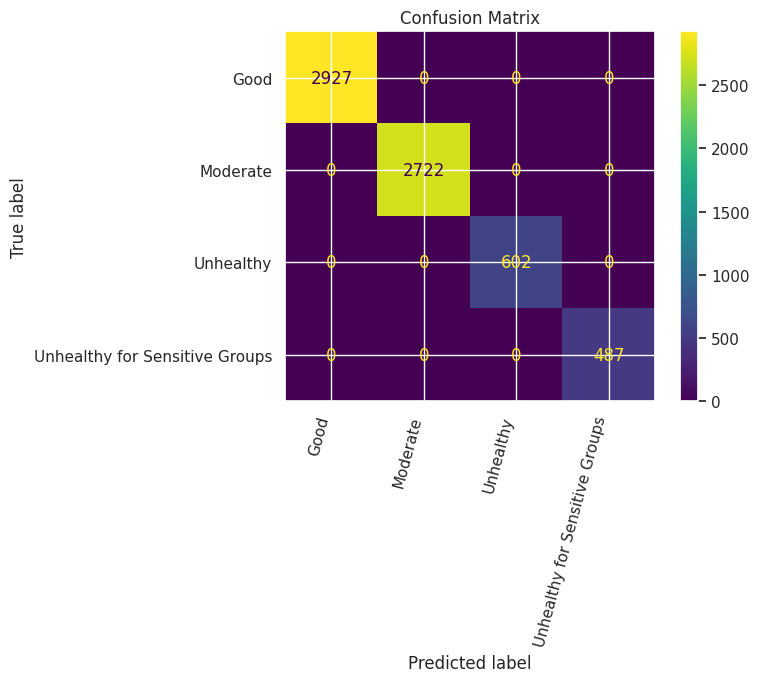

In [ ]:
def plotConfusionMatrix(preds,classes):

    #make confusion matrix display
    cm=confusion_matrix(y_test,preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
    fig =plt.figure(figsize=(20,8))
    disp.plot()
    plt.xticks(rotation = 75, ha = 'right')
    plt.title('Confusion Matrix')


pipeline = Pipeline([
    ('classifier', LogisticRegression(solver='liblinear', max_iter=5000))
    ])

pipeline.fit(X_train,y_train)
preds = pipeline.predict(X_test)

plotConfusionMatrix(preds,pipeline.classes_)





In [ ]:
import pickle
import gzip
pkl_filename = "pickle_model.pkl"

with gzip.open(pkl_filename, 'wb') as f:
    pickle.dump(pipeline, f)